# Programming for Data Science and Artificial Intelligence

## Logistic Regression using Sklearn

### Readings: 
- [GERON] Ch4
- [VANDER] Ch5
- [HASTIE] Ch4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Logistic Regression

Let's use sklearn to perform logistic regression with ease.  We shall play with a toy iris dataset, which is about predicting the family of iris using petal and sepal width and height (total of 4 features).

Let's see how does it look in code:

### 1. Prepare data

#### 1.1 Get your X and y in the right shape for Sklearn

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features.
y = iris.target  #note that for sklearn, you DON'T NEED to label encode, sklearn automatically do it for you

#### 1.2 Visualize our data

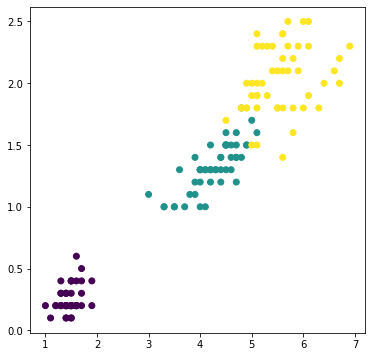

In [3]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#### 1.3 Train test split your data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 1.4 Feature scale your data to reach faster convergence

In [5]:
#feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### 1.5 Add intercepts

In [6]:
#add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

### Step 2: Fit your algorithm 

#### 1. Define your algorithm

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

#### 2. Nested cross-validation

In [8]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold

# define search space
param_grid = dict()
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
#https://scikit-learn.org/dev/modules/linear_model.html#logistic-regression
    
#specify the inner cv and outer cv
inner_cv = KFold(n_splits=4, shuffle=True, random_state=20)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=20)

grid = GridSearchCV(model, param_grid, cv=inner_cv, refit=True)
scores = cross_val_score(grid, X, y, cv=outer_cv)

scores  #<---hmm..not so stable! this means our search space and model can be better

#for simplicity, i shall skip finding another model, because this lecture is about logistic regression
#thus, i will just jump to grid search to find the best model

array([0.92105263, 1.        , 0.94594595, 0.94594595])

#### 3. Grid Search

In [9]:
# define search space
param_grid = dict()
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear']

grid = GridSearchCV(model, param_grid, cv=inner_cv, refit=True)
grid.fit(X_train, y_train)

print("Best params: ", grid.best_params_)

Best params:  {'solver': 'newton-cg'}


#### 4. Compute accuracy

In [10]:
from sklearn.metrics import accuracy_score

yhat = grid.predict(X_test)
accuracy_score(y_test, yhat)

0.8666666666666667

Cool!  As you can see, sklearn really make machine learning easy.  However, we need to know that accuracy is actually a very poor metric, especially in the case of imbalanced data.

### Classification metrics

Let us study some classification metrics that are quite different from the $r^2$ or mean squared error that we see from the regression.  Let me define a confusion matrix that looks like this:

<code>
		 	    Actual
			    +	   -
Predicted +     TP     FP
          -     FN     TN
</code>

TP is defined as true positives, FP as false positives, FN as false negatives, and TN as true negatives.

#### Accuracy, Recall, Precision, F1

Accuracy is straightforward

$$ \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} $$

**Accuracy** is mostly avoided, unless your model is really balanced of both positives and negatives.  Instead, more useful classification metrics would be precision, recall, and f1-score

$$ \text{Precision} = \text{TP} / (\text{TP} + \text{FP}) $$

**Precision** is useful as metric when you want to prioritize removing false positive.  Example is search engine in which you do not want to return any search results that are "false positive"

$$ \text{Recall} = \text{TP} / (\text{TP} + \text{FN}) $$

**Recall** is useful as metric when you want to prioritize removing false negative.  Example is cancer detection in which you do not want to miss detecting any real positive (i.e., false negative).

$$ \text{F1} = 2 x \frac{\text{Precision} * \text{Recall}}{\text{Precision} + \text{Recall}} $$

**F1** is simply seeking a balance between Precision and Recall.  Also F1 is good metric when there is an uneven class distribution (large number of actual negatives)

sklearn provides a easy-to-use <code>**sklearn.metrics.classification_report**.</code> API that report these four metrics:

In [11]:
from sklearn.metrics import classification_report
print("=========Classification report=======")
print(classification_report(y_test, yhat))

=========Classification report=======
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.57      0.73        14
           2       0.67      1.00      0.80        12

    accuracy                           0.87        45
   macro avg       0.89      0.86      0.84        45
weighted avg       0.91      0.87      0.86        45



Let's explain the classification report a bit:

- <code>weight_avg</code> mutiplies score with the number of true labels in that class, favoring the majority label
#macro simply average, thus better for imbalanced dataset

- <code>macro_avg</code> 

- <code>support</code> refers to number of samples belonging to that class

Between precision or recall or f1?
- Use **recall** for dangerous stuffs - healthcare, security, fraud. You don't care about false positives too much (i.e., false alarm) because you want to always stay fully cautious.

- Use **precision** for search/identifying something - HR, search engine, etc.  You care a lot about false positive, i.e., you want to identify really good sample.

- Use **f1-score** - basically a good bet for almost all imbalanced dataset.

Final (my) recommendations:
- in balanced dataset, just simply use <code>accuracy</code>
- in imbalanced dataset, use <code>macro avg f1-score</code> or <code>macro precision</code> or <code>macro recall</code>